# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Perform inference with a pretrained text recognizer
- Perform inference with a pretrained text detector
- Perform end-to-end OCR with pretrained recognizer and detector
- Combine OCR with downstream tasks
- Perform inference with a pretrained Key Information Extraction (KIE) model
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR

When installing dependencies for mmocr, please ensure that all the dependency versions are compatible with each other. For instance, if CUDA 10.1 is installed, then the Pytorch version must be compatible with cu10.1. Please see [getting_started.md](docs/getting_started.md) for more details. 

In [12]:
%cd ..

/


### Check NVCC and GCC compiler version

In [2]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### Install Dependencies 

In [13]:
# Install torch dependencies: (use cu110 since colab has CUDA 11)
!pip install -U torch==1.7.0+cu110 torchvision==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
tcmalloc: large alloc 1137090560 bytes == 0x55fec2658000 @  0x7ff4c85391e7 0x55febfab6a18 0x55febfa81987 0x55febfc00335 0x55febfb9aa48 0x55febfa85252 0x55febfb6396e 0x55febfa84ea9 0x55febfb76c0d 0x55febfaf90d8 0x55febfa8665a 0x55febfaf4d67 0x55febfa8665a 0x55febfaf4d67 0x55febfaf3dcc 0x55febfa86fec 0x55febfa871f1 0x55febfaf6318 0x55febfaf3c35 0x55febfa86fec 0x55febfa871f1 0x55febfaf6318 0x55febfaf3c35 0x55febfa86fec 0x55febfa871f1 0x55febfaf6318 0x55febfaf3dcc 0x55febfa86fec 0x55febfa871f1 0x55febfaf6318 0x55febfaf3c35
tcmalloc: large alloc 1421369344 bytes == 0x55ff062c2000 @  0x7ff4c853a615 0x55febfa8202c 0x55febfb6217a 0x55febfa84e4d 0x55febfb76c0d 0x55febfaf90d8 0x55febfaf3c35 0x55febfa8673a 0x55febfaf4d67 0x55febfaf3c35 0x55febfa8673a 0x55febfaf4d67 0x55febfaf3c35 0x55febfa8673a 0x55febfaf4d67 0x55febfaf3c35 0x55febfa8673a 0x55febfaf4d67 0x55febfaf3c35 0x55febfa8673a 0x55febfaf4d67 0x55febfa8665a 0x55febfaf4d67 0

Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html
fatal: destination path 'mmocr' already exists and is not an empty directory.
/mmocr
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value

In [5]:
!pip uninstall mmcv-full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html --no-cache-dir

Found existing installation: mmcv-full 1.3.11
Uninstalling mmcv-full-1.3.11:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/mmcv/*
    /usr/local/lib/python3.7/dist-packages/mmcv_full-1.3.11.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled mmcv-full-1.3.11
Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html
     |████████████████████████████████| 307 kB 8.2 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.11-cp37-cp37m-linux_x86_64.whl size=25895154 sha256=8cedf064bd88018d0cfba49032423d19888db695f5dc98dce606653bc40d8321
  Stored in directory: /tmp/pip-ephem-wheel-cache-8t9ngi9u/wheels/4c/8f/1d/903456a291e5bf33d99cb03cb1bbc822e2c5d32c123b873ebe
Successfully built mmcv-full


### Check Installed Dependencies Versions

In [12]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.7.0+cu110 True
2.15.1
1.3.11
11.0
GCC 7.5
0.2.1
/mmocr
configs  docs_zh_CN   mmocr.egg-info   requirements	 setup.py
demo	 LICENSE      model-index.yml  requirements.txt  tests
docker	 MANIFEST.in  README.md        resources	 tools
docs	 mmocr	      README_zh-CN.md  setup.cfg


# Inference

We provide an easy-to-use inference script, `mmocr/utils/ocr.py`, that can be either called through command line or imported as an object (the `MMOCR` class inside). In this notebook, we choose the latter option for ease of demonstration. You can check out its full usage and examples in our [official documentation](https://mmocr.readthedocs.io/en/latest/demo.html).

## Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a [demo text recognition image](https://github.com/open-mmlab/mmocr/raw/main/demo/demo_text_recog.jpg) with a pretrained text recognizer using command line. SAR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/latest/textrecog_models.html#show-attend-and-read-a-simple-and-strong-baseline-for-irregular-text-recognition). But you don't need to download it manually -- Our inference script handles these cumbersome setup steps for you! 

Run the following command and the recognition result will be saved to `outputs/demo_text_recog_pred.jpg`. We will visualize the result in the end.

In [15]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det=None, recog='SAR')
mmocr.readtext('demo/demo_text_recog.jpg', print_result=True, output='outputs/demo_text_recog_pred.jpg')

Use load_from_http loader


/mmocr/mmocr/apis/inference.py:48: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


{'text': 'STAR', 'score': 0.9664112031459808}



[{'score': 0.9664112031459808, 'text': 'STAR'}]

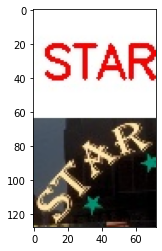

In [16]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_recog_pred.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained TextSnake text detector and visualize the bounding box results for the demo text detection image provided in [demo_text_det.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_det.jpg).

In [18]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog=None)
mmocr.readtext('demo/demo_text_det.jpg', print_result=True, output='outputs/demo_text_det_pred.jpg')

Use load_from_http loader


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth" to /root/.cache/torch/hub/checkpoints/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


  0%|          | 0.00/139M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


{'boundary_result': [[180.700901389122, 202.125, 180.32600325345993, 202.5, 178.82641071081161, 202.5, 178.45151257514954, 202.875, 177.70171630382538, 202.875, 176.57702189683914, 204.0, 176.20212376117706, 204.0, 176.20212376117706, 204.375, 175.07742935419083, 205.5, 175.07742935419083, 206.25, 174.70253121852875, 206.625, 174.70253121852875, 208.125, 174.32763308286667, 208.5, 174.32763308286667, 208.875, 174.70253121852875, 209.25, 174.70253121852875, 210.75, 175.07742935419083, 211.125, 175.07742935419083, 211.875, 175.82722562551498, 212.625, 175.82722562551498, 213.0, 176.95192003250122, 214.125, 177.3268181681633, 214.125, 178.07661443948746, 214.875, 178.82641071081161, 214.875, 179.2013088464737, 215.25, 179.57620698213577, 215.25, 180.32600325345993, 216.0, 180.700901389122, 216.0, 181.0757995247841, 216.375, 181.45069766044617, 216.375, 181.82559579610825, 216.75, 182.5753920674324, 216.75, 182.95029020309448, 217.125, 184.07498461008072, 217.125, 184.4498827457428, 217.5,

[{'boundary_result': [[180.700901389122,
    202.125,
    180.32600325345993,
    202.5,
    178.82641071081161,
    202.5,
    178.45151257514954,
    202.875,
    177.70171630382538,
    202.875,
    176.57702189683914,
    204.0,
    176.20212376117706,
    204.0,
    176.20212376117706,
    204.375,
    175.07742935419083,
    205.5,
    175.07742935419083,
    206.25,
    174.70253121852875,
    206.625,
    174.70253121852875,
    208.125,
    174.32763308286667,
    208.5,
    174.32763308286667,
    208.875,
    174.70253121852875,
    209.25,
    174.70253121852875,
    210.75,
    175.07742935419083,
    211.125,
    175.07742935419083,
    211.875,
    175.82722562551498,
    212.625,
    175.82722562551498,
    213.0,
    176.95192003250122,
    214.125,
    177.3268181681633,
    214.125,
    178.07661443948746,
    214.875,
    178.82641071081161,
    214.875,
    179.2013088464737,
    215.25,
    179.57620698213577,
    215.25,
    180.32600325345993,
    216.0,
    180

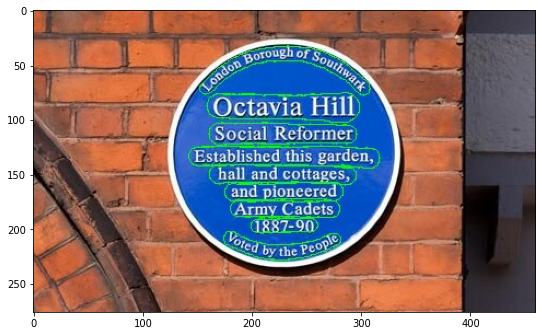

In [19]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_det_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform end-to-end OCR with pretrained recognizer and detector

With the help of `ocr.py`, we can easily combine any text detector and recognizer into a pipeline that forms a standard OCR step. Now we build our own OCR pipeline with TextSnake and SAR and apply it to [demo_text_ocr.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_ocr.jpg).

In [21]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR')
mmocr.readtext('demo/demo_text_ocr.jpg', print_result=True, output='outputs/demo_text_ocr_pred.jpg')

Use load_from_http loader
Use load_from_http loader


/mmocr/mmocr/apis/inference.py:48: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


{'filename': 'demo_text_ocr', 'text': ['OCBCBANK', 'soculationists', 'sanetal.enance.ounces', '70%', 'ROUND', 'SALE', 'ALLYEAR', 'is', 'SALE']}



[{'filename': 'demo_text_ocr',
  'text': ['OCBCBANK',
   'soculationists',
   'sanetal.enance.ounces',
   '70%',
   'ROUND',
   'SALE',
   'ALLYEAR',
   'is',
   'SALE']}]

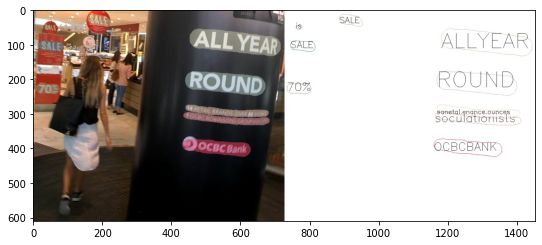

In [22]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_ocr_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to [demo_kie.jpeg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_kie.jpeg) and visualize its prediction based on the OCR result.


In [24]:
# SDMGR relies on the dictionary provided in wildreceipt
# First download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2021-08-23 03:17:39--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar’

wildreceipt.tar     100%[===================>] 176.74M  11.2MB/s    in 16s     

2021-08-23 03:17:58 (10.8 MB/s) - ‘wildreceipt.tar’ saved [185323520/185323520]



In [25]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR')
mmocr.readtext('demo/demo_kie.jpeg', print_result=True, output='outputs/demo_kie_pred.jpg')

Use load_from_http loader
Use load_from_http loader


/mmocr/mmocr/apis/inference.py:48: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


Use load_from_http loader


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmocr/mmocr/datasets/kie_dataset.py:46: UserWarning: KIEDataset is only initialized as a downstream demo task of text detection and recognition without an annotation file.
  'without an annotation file.', UserWarning)


{'filename': 'demo_kie', 'text': ['Appraval:052723', 'Acct:Xexexxx8425', '128.27', 'Master', '128.27', 'Total', 'Tax', '11.02', '117.25', 'subTotal', 'Cheese', '10.47', '3.Perreroni', '11.07', '3Supreme', '11.97', '26', '43.94', '0.00', '12.Crunchy.Taco', '10.00', 'SLACOMPARTY', '0.00', '12SFTTACO', '10.00', 'SFtt.Tac.Party.', '0.00', 'MONODELONS', '0.00', '10.Bean', 'Grande', '9.90', 'Beatean', '0.00', 'grande', '9.90', '0rder-113533', 'Cashier:.Eric', '7/30/2012', '8:27:32', '=Article-I.D.:']}



[{'filename': 'demo_kie',
  'text': ['Appraval:052723',
   'Acct:Xexexxx8425',
   '128.27',
   'Master',
   '128.27',
   'Total',
   'Tax',
   '11.02',
   '117.25',
   'subTotal',
   'Cheese',
   '10.47',
   '3.Perreroni',
   '11.07',
   '3Supreme',
   '11.97',
   '26',
   '43.94',
   '0.00',
   '12.Crunchy.Taco',
   '10.00',
   'SLACOMPARTY',
   '0.00',
   '12SFTTACO',
   '10.00',
   'SFtt.Tac.Party.',
   '0.00',
   'MONODELONS',
   '0.00',
   '10.Bean',
   'Grande',
   '9.90',
   'Beatean',
   '0.00',
   'grande',
   '9.90',
   '0rder-113533',
   'Cashier:.Eric',
   '7/30/2012',
   '8:27:32',
   '=Article-I.D.:']}]

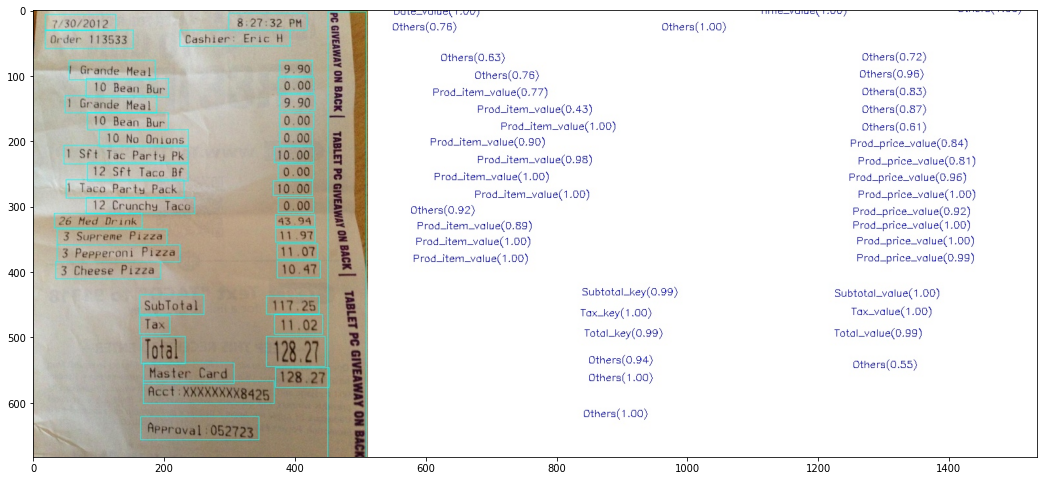

In [28]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_kie_pred.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Testing with a Pretrained KIE Model

We perform testing on the WildReceipt dataset for KIE model by first downloading the .tar file from [Datasets Preparation](https://mmocr.readthedocs.io/en/latest/datasets.html) in MMOCR documentation and then extract the dataset. We have chosen the Visual + Textual moduality test dataset, which we evaluate with Macro F1 metrics.

In [ ]:
# Can skip this step if you have downloaded wildreceipt in the last section
# Download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2021-05-17 11:39:10--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar.3’

wildreceipt.tar.3   100%[===================>] 176.74M  17.7MB/s    in 10s     

2021-05-17 11:39:21 (17.1 MB/s) - ‘wildreceipt.tar.3’ saved [185323520/185323520]



In [29]:
# Test the dataset with macro f1 metrics 
!python tools/test.py configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth --eval macro_f1

Use load_from_http loader
Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth" to /root/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth
100% 18.4M/18.4M [00:01<00:00, 10.2MB/s]
[>>] 472/472, 21.1 task/s, elapsed: 22s, ETA:     0s{'macro_f1': 0.87641114}


## Perform Training on a Toy Dataset with MMOCR Recognizer
We now demonstrate how to perform training with an MMOCR recognizer. Since training a full academic dataset is time consuming (usually takes about several hours), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a dataset usually consists of the following steps:
1. Convert the dataset into a format supported by MMOCR (e.g. COCO for text detection). The annotation file can be in either .txt or .lmdb format, depending on the size of the dataset. This step is usually applicable to customized datasets, since the datasets and annotation files we provide are already in supported formats. 
2. Modify the config for training. 
3. Train the model. 

The toy dataset consisits of ten images as well as annotation files in both txt and lmdb format, which can be found in [ocr_toy_dataset](https://github.com/open-mmlab/mmocr/tree/main/tests/data/toy_dataset). 

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. 

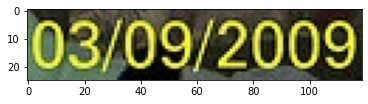

In [30]:
import mmcv
import matplotlib.pyplot as plt 

img = mmcv.imread('./tests/data/ocr_toy_dataset/imgs/1036169.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [31]:
# Inspect the labels of the annootation file
!cat tests/data/ocr_toy_dataset/label.txt

1223731.jpg GRAND
1223733.jpg HOTEL
1223732.jpg HOTEL
1223729.jpg PACIFIC
1036169.jpg 03/09/2009
1190237.jpg ANING
1058891.jpg Virgin
1058892.jpg america
1240078.jpg ATTACK
1210236.jpg DAVIDSON


### Modify the Configuration File

In order to perform inference for SAR on colab, we need to modify the config file to accommodate some of the settings of colab such as the number of GPU available. 

In [32]:
from mmcv import Config
cfg = Config.fromfile('./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py')

In [33]:
from mmdet.apis import set_random_seed

# Set up working dir to save files and logs.
cfg.work_dir = './demo/tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None
# Choose to log training results every 40 images to reduce the size of log file. 
cfg.log_config.interval = 40

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.000125)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step', step=[3, 4], warmup=None)
total_e

### Train the SAR Text Recognizer 
Finally, we train the SAR text recognizer on the toy dataset for five epochs. 

In [34]:
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/mmocr/mmocr/apis/train.py:80: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  'please set `runner` in your config.', UserWarning)
2021-08-23 03:27:59,310 - mmocr - INFO - Start running, host: root@0c6e7899740e, work_dir: /mmocr/demo/tutorial_exps
2021-08-23 03:27:59,311 - mmocr - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LO

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.6 task/s, elapsed: 6s, ETA:     0s

2021-08-23 03:29:13,961 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 100 images now
2021-08-23 03:29:13,975 - mmocr - INFO - Epoch(val) [1][13]	0_word_acc: 0.9000, 0_word_acc_ignore_case: 0.9000, 0_word_acc_ignore_case_symbol: 0.9000, 0_char_recall: 0.9355, 0_char_precision: 0.9062, 0_1-N.E.D: 0.9000
2021-08-23 03:29:26,001 - mmocr - INFO - Epoch [2][40/250]	lr: 1.250e-04, eta: 0:04:08, time: 0.300, data_time: 0.054, memory: 2149, loss_ce: 0.4840, loss: 0.4840
2021-08-23 03:29:36,000 - mmocr - INFO - Epoch [2][80/250]	lr: 1.250e-04, eta: 0:03:57, time: 0.250, data_time: 0.002, memory: 2149, loss_ce: 0.3639, loss: 0.3639
2021-08-23 03:29:46,164 - mmocr - INFO - Epoch [2][120/250]	lr: 1.250e-04, eta: 0:03:46, time: 0.254, data_time: 0.002, memory: 2149, loss_ce: 0.3488, loss: 0.3488
2021-08-23 03:29:56,310 - mmocr - INFO - Epoch [2][160/250]	lr: 1.250e-04, eta: 0:03:36, time: 0.254, data_time: 0.002, memory: 2149, loss_ce: 0.3102, loss: 0.3102
2021-08-23 03:30

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.4 task/s, elapsed: 6s, ETA:     0s

2021-08-23 03:30:27,896 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 100 images now
2021-08-23 03:30:27,903 - mmocr - INFO - Epoch(val) [2][13]	0_word_acc: 0.9000, 0_word_acc_ignore_case: 0.9000, 0_word_acc_ignore_case_symbol: 0.9000, 0_char_recall: 0.9355, 0_char_precision: 0.9062, 0_1-N.E.D: 0.9000
2021-08-23 03:30:39,993 - mmocr - INFO - Epoch [3][40/250]	lr: 1.250e-04, eta: 0:03:00, time: 0.301, data_time: 0.054, memory: 2149, loss_ce: 0.2920, loss: 0.2920
2021-08-23 03:30:49,971 - mmocr - INFO - Epoch [3][80/250]	lr: 1.250e-04, eta: 0:02:50, time: 0.249, data_time: 0.002, memory: 2149, loss_ce: 0.2860, loss: 0.2860
2021-08-23 03:30:59,999 - mmocr - INFO - Epoch [3][120/250]	lr: 1.250e-04, eta: 0:02:40, time: 0.251, data_time: 0.002, memory: 2149, loss_ce: 0.2801, loss: 0.2801
2021-08-23 03:31:10,073 - mmocr - INFO - Epoch [3][160/250]	lr: 1.250e-04, eta: 0:02:29, time: 0.252, data_time: 0.002, memory: 2149, loss_ce: 0.2863, loss: 0.2863
2021-08-23 03:31

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.3 task/s, elapsed: 7s, ETA:     0s

2021-08-23 03:31:41,616 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 100 images now
2021-08-23 03:31:41,622 - mmocr - INFO - Epoch(val) [3][13]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2021-08-23 03:31:53,746 - mmocr - INFO - Epoch [4][40/250]	lr: 1.250e-05, eta: 0:01:56, time: 0.302, data_time: 0.054, memory: 2149, loss_ce: 0.2739, loss: 0.2739
2021-08-23 03:32:03,736 - mmocr - INFO - Epoch [4][80/250]	lr: 1.250e-05, eta: 0:01:46, time: 0.250, data_time: 0.002, memory: 2149, loss_ce: 0.2507, loss: 0.2507
2021-08-23 03:32:13,784 - mmocr - INFO - Epoch [4][120/250]	lr: 1.250e-05, eta: 0:01:36, time: 0.251, data_time: 0.002, memory: 2149, loss_ce: 0.2563, loss: 0.2563
2021-08-23 03:32:23,840 - mmocr - INFO - Epoch [4][160/250]	lr: 1.250e-05, eta: 0:01:25, time: 0.251, data_time: 0.002, memory: 2149, loss_ce: 0.2738, loss: 0.2738
2021-08-23 03:32

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.4 task/s, elapsed: 6s, ETA:     0s

2021-08-23 03:32:55,484 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 100 images now
2021-08-23 03:32:55,492 - mmocr - INFO - Epoch(val) [4][13]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2021-08-23 03:33:07,613 - mmocr - INFO - Epoch [5][40/250]	lr: 1.250e-06, eta: 0:00:52, time: 0.302, data_time: 0.054, memory: 2149, loss_ce: 0.2637, loss: 0.2637
2021-08-23 03:33:17,612 - mmocr - INFO - Epoch [5][80/250]	lr: 1.250e-06, eta: 0:00:42, time: 0.250, data_time: 0.002, memory: 2149, loss_ce: 0.2344, loss: 0.2344
2021-08-23 03:33:27,652 - mmocr - INFO - Epoch [5][120/250]	lr: 1.250e-06, eta: 0:00:32, time: 0.251, data_time: 0.002, memory: 2149, loss_ce: 0.2523, loss: 0.2523
2021-08-23 03:33:37,712 - mmocr - INFO - Epoch [5][160/250]	lr: 1.250e-06, eta: 0:00:22, time: 0.251, data_time: 0.002, memory: 2149, loss_ce: 0.2391, loss: 0.2391
2021-08-23 03:33

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 15.4 task/s, elapsed: 6s, ETA:     0s

2021-08-23 03:34:09,084 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 100 images now
2021-08-23 03:34:09,090 - mmocr - INFO - Epoch(val) [5][13]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000


### Test and Visualize the Predictions

For completeness, we also perform testing on the latest checkpoint and evaluate the results with hmean-iou metrics. The predictions are saved in the ./outputs file. 

In [35]:
from mmocr.apis import init_detector, model_inference

img = './tests/data/ocr_toy_dataset/imgs/1036169.jpg'
checkpoint = "./demo/tutorial_exps/epoch_5.pth"
out_file = 'outputs/1036169.jpg'

model = init_detector(cfg, checkpoint, device="cuda:0")
if model.cfg.data.test['type'] == 'ConcatDataset':
    model.cfg.data.test.pipeline = model.cfg.data.test['datasets'][0].pipeline


result = model_inference(model, img)
print(f'result: {result}')

img = model.show_result(
        img, result, out_file=out_file, show=False)

mmcv.imwrite(img, out_file)

Use load_from_local loader
result: {'text': '03/09/2009', 'score': [0.9998674392700195, 0.9986717700958252, 0.9974325299263, 0.9999891519546509, 0.9976925849914551, 0.9968488812446594, 0.997633695602417, 0.9999977350234985, 0.999995231628418, 0.9993376135826111]}


True

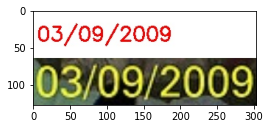

In [36]:
# Visualize the results
predicted_img = mmcv.imread('./outputs/1036169.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()